In [1]:
using DelimitedFiles, Plots, LinearAlgebra, Random

In [2]:
Random.seed!(1)
M = [1. -0.4; 0.3 0.8]
eigen(M)

T = 15
position = 3*ones(2,T)

for t=2:T
    position[:,t] = M*position[:,t-1]
end

sensor1 = [5.,5.]
sensor2 = [-2.,0.]
sensor3 = [0.,15.]
;

2-element Array{Float64,1}:
  0.0
 15.0

In [3]:
infer_plot = readdlm("BBVI_q_z_mean.txt")
smooth_plot = readdlm("SVMP_q_z_mean.txt")
;

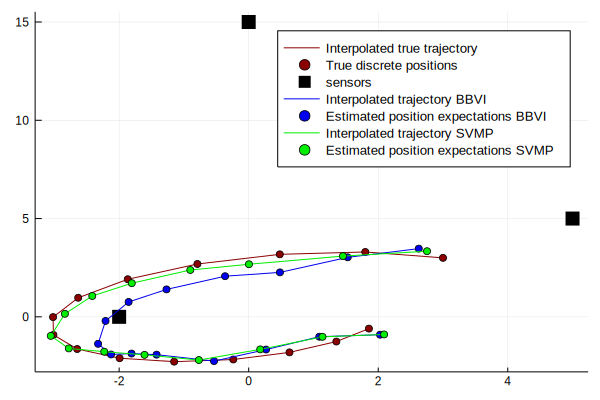

In [40]:
plot(position[1,:],position[2,:],color=:redsblues,legend=:topright, label="Interpolated true trajectory", legendfontsize=9)
plot!(position[1,:],position[2,:], seriestype = :scatter,color=:redsblues, label="True discrete positions")
plot!([sensor1[1],sensor2[1],sensor3[1]],[sensor1[2],sensor2[2],sensor3[2]],seriestype = :scatter,color=:black, markersize=7, markershape=:square, label="sensors")
plot!(infer_plot[1,:],infer_plot[2,:],color=:blue2, label="Interpolated trajectory BBVI")
plot!(infer_plot[1,:],infer_plot[2,:], seriestype = :scatter,color=:blue2, label="Estimated position expectations BBVI")
plot!(smooth_plot[1,:],smooth_plot[2,:],color=:green2, label="Interpolated trajectory SVMP")
plot!(smooth_plot[1,:],smooth_plot[2,:], seriestype = :scatter,color=:green2, label="Estimated position expectations SVMP")

In [13]:
BBVI_FE_x = readdlm("BBVI_FE_x.txt")
BBVI_FE_y = readdlm("BBVI_FE_y.txt")
SVMP_FE_x = readdlm("SVMP_FE_x.txt")
SVMP_FE_y = readdlm("SVMP_FE_y.txt")
;

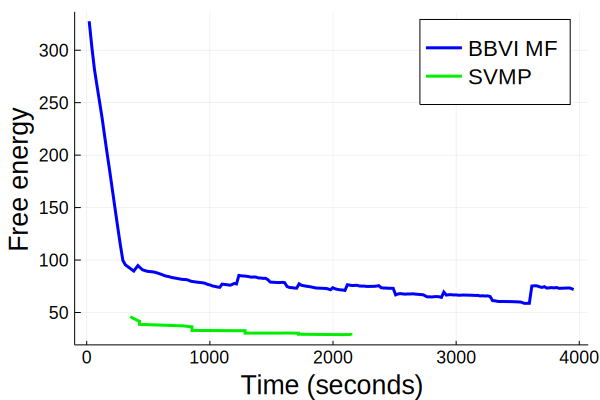

In [41]:
# Plot free energy over time
plot(BBVI_FE_x, BBVI_FE_y, color=:blue, lw=3, label="BBVI MF",legendfontsize=15, xlabel = "Time (seconds)", xguidefontsize=18, xtickfont=12, ylabel = "Free energy", yguidefontsize=18, ytickfont=12)
plot!(SVMP_FE_x, SVMP_FE_y, color=:green2, lw=3, label="SVMP")

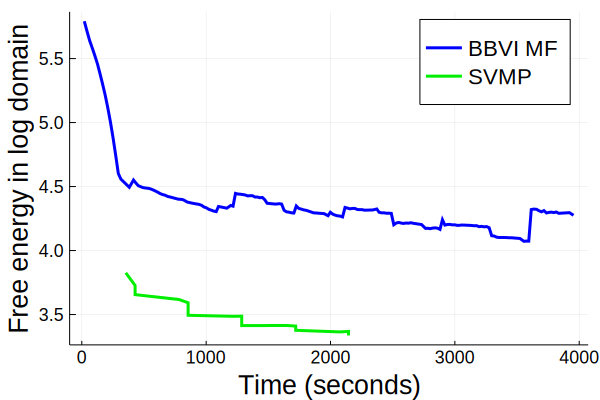

In [42]:
# Plot free energy over time
plot(BBVI_FE_x, log.(BBVI_FE_y), color=:blue, lw=3, label="BBVI MF",legendfontsize=15, xlabel = "Time (seconds)", xguidefontsize=18, xtickfont=12, ylabel = "Free energy in log domain", yguidefontsize=18, ytickfont=12)
plot!(SVMP_FE_x, log.(SVMP_FE_y), color=:green2, lw=3, label="SVMP")